NameError: name 'np' is not defined

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
from scipy import stats


In [4]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94, 54.95, 50.39, 52.91, 51.5, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3, 53.84, 53.16 ])

In [5]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40,75)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu, sigma, observed=data)
    trace_g = pm.sample(1100)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_100 draw iterations (2_000 + 2_200 draws total) took 2 seconds.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabbd8825d0>,
      dtype=object)

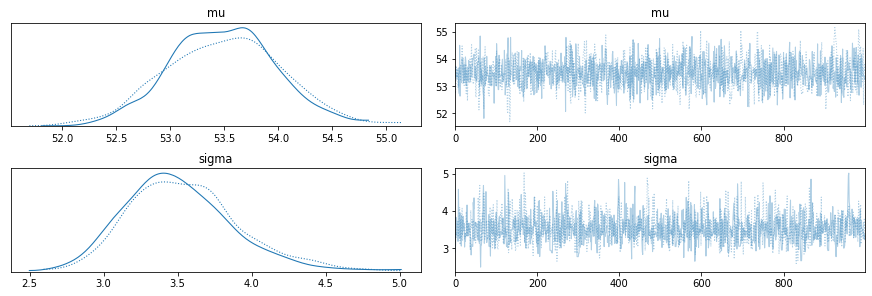

In [6]:
chain_g = trace_g[100:]
pm.traceplot(chain_g)


In [7]:
y_pred = pm.sample_ppc(chain_g, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i, c='r', alpha=0.1)
plt.xlim(35,75)
plt.title("Gaussian model", fontsize=16)
plt.xlabel("$x$")
plt.savefig("img000.png")

df = pm.summary(chain_g)
print(df)


AttributeError: module 'pymc3' has no attribute 'sample_ppc'